<h1>Capstone Project</h1>
<h2>The Battle of Neighborhoods (Week 2)</h2>
<h3>Applied Data Science Capstone by IBM/Coursera</h3>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction/Business Problem <a name="introduction"></a>

The challenge is to find a suitable apartment for rent in Manhattan NY that complies with the demands on location, price and venues. The major purpose of this project, is to suggest a better apartment, neighborhood in a new city for the person who are shiffting there. Social presence in society in terms of like minded people. Connectivity to the airport, bus stand, city center, markets and other daily needs things nearby. The key question is : How can we find a convenient and enjoyable place similar to current you are living? Certainly, We can use available real estate apps and Google but the idea is to use and apply the learned tools during the course. In order to make a comparison and evaluation of the rental options in Manhattan NY, we must set some basis, therefore the apartment in Manhattan must meet the following demands:

1. 2 or 3 bedrooms apartment
2. Desired location is near a metro station in the Manhattan area and within 1.0 mile (1.6 km) radius
3. Rent Price should not exceed 7,000 dollar per month
4. Top ammenities in the selected neighborhood shall be similar to current residence
5. Desirable to have venues such as coffee shops, restaurants Asian Thai, wine stores, gym and food shops

## Data Description<a name="data"></a>

The following data is required to answer the issues of the problem:

1. List of Boroughs and neighborhoods of Manhattan with their geodata (latitude and longitude)
2. List of Subway metro stations in Manhattan with their address location
3. List of apartments for rent in Manhattan area with their addresses and price
4. Preferably, a list of apartment for rent with additional information, such as price, address, area, numbers of beds, etc
5. Venues for each Manhattan neighborhood ( than can be clustered)
6. Venues for subway metro stations, as needed

<h3>Using dataset to Solve the Problem</h3>

The data will be used as follows:

1. Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB)
2. Use foursquare and geopy data to map the location of subway metro stations, separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately
3. Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations.
4. Create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. We will be able to quickly point to the popups to know the relative price per subway area.
5. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim.
6. Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.

## Methodology <a name="methodology"></a>

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.
The procesing of these data will allow to answer the key questions to make a decision:

1. What is the cost of rent (per square ft) around a mile radius from each subway metro station?
2. What is the area of Manhattan with best rental pricing that meets criteria established?
3. What is the distance from work place ( Park Ave and 53 rd St) and the tentative future home?
4. What are the venues of the two best places to live? How the prices compare?
5. How venues distribute among Manhattan neighborhoods and around metro stations?
6. Are there tradeoffs between size and price and location?
7. Any other interesting statistical data findings of the real estate and overall data.

## Analysis <a name="analysis"></a>

<h4>Loading pre-libraries</h4>

In [91]:
import numpy as np # Library to handle data in a vectorized manner
import time
import pandas as pd # Library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


<h4>Mapping Data</h4>

Singapore Map Residence and Venues in Neighborhood for comparing to future Manhattan place.

In [92]:
#!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
#!pip install geocoder
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Location: Shenton Way, District 01, Singapore
address = 'Mccallum Street, Singapore'
geolocator = Nominatim(user_agent = "singapore_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.2795465, 103.8476049.


In [93]:
print('neighborhood_latitude = {}'.format(latitude))
print('neighborhood_longitude = {}'.format(longitude))

neighborhood_latitude = 1.2795465
neighborhood_longitude = 103.8476049


<h4>FourSquare to find Venues around current residence in Singapore</h4>

In [94]:
CLIENT_ID = 'EAWKNZFVPKCNJXS2D24BLWNN5GJZ15UI24SQDO3O2ZTMRUM0' # your Foursquare ID
CLIENT_SECRET = 'MKOPUWDGHEEXLZ4JJWUHWYVPRFJEOBNK51JP3RQZY02ZKWJS' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EAWKNZFVPKCNJXS2D24BLWNN5GJZ15UI24SQDO3O2ZTMRUM0
CLIENT_SECRET:MKOPUWDGHEEXLZ4JJWUHWYVPRFJEOBNK51JP3RQZY02ZKWJS


In [103]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=EAWKNZFVPKCNJXS2D24BLWNN5GJZ15UI24SQDO3O2ZTMRUM0&client_secret=MKOPUWDGHEEXLZ4JJWUHWYVPRFJEOBNK51JP3RQZY02ZKWJS&v=20180604&ll=1.2795465,103.8476049&radius=500&limit=100'

In [104]:
# results display is hidden for report simplification 
import requests # library to handle requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f373d67cf2d854abd8e8ec0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Financial District',
  'headerFullLocation': 'Financial District, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 181,
  'suggestedBounds': {'ne': {'lat': 1.2840465045000045,
    'lng': 103.8520976227615},
   'sw': {'lat': 1.2750464954999954, 'lng': 103.84311217723848}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51b49e49abd88dd0b4e7330f',
       'name': 'Napoleon Food & Wine Bar',
       'location': {'address': '206 Telok Ayer Street',
        'lat': 1.2799249387439204,
        'lng': 103.84733300574288,
        'labeledLatLngs': [{'lab

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [105]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [106]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]

# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)

# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

/Users/kevilkhadka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


(100, 4)

In [107]:
# Venues near current Singapore residence place
SGnearby_venues.head(10)

,name,categories,lat,lng
0,Napoleon Food & Wine Bar,Wine Bar,1.279925,103.847333
1,Native,Cocktail Bar,1.280135,103.846844
2,Park Bench Deli,Deli / Bodega,1.279872,103.847287
3,PS.Cafe,Café,1.280468,103.846264
4,왕대박 Wang Dae Bak Korean BBQ Restaurant,Korean Restaurant,1.281345,103.847551
5,Yen Yakiniku,Japanese Restaurant,1.281074,103.845743
6,Freehouse,Beer Garden,1.281254,103.848513
7,Mellower Coffee,Café,1.277814,103.848188
8,Pepper Bowl,Asian Restaurant,1.279371,103.846710
9,Sarnies,Sandwich Place,1.281529,103.848117


In [108]:
import folium # map rendering library
from folium import plugins

latitude = 1.2792655
longitude = 103.8480938

# create map of Singapore place  using latitude and longitude values
map_Singapore = folium.Map(location=[latitude, longitude], zoom_start=18)

# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
        parse_html = False).add_to(map_Singapore)  
    
map_Singapore

<h3>Manhattan Neighborhood - DATA AND MAPPING</h3>

Cluster neighborhood data was produced with Foursquare during course lab work. A csv file was produced containing the neighborhoods around the 40 Boroughs. Now, the csv file is just read for convenience and consolidation of report.

In [51]:
# Read csv file with clustered neighborhoods with geodata
manhattan_data  = pd.read_csv('mh_neigh_data.csv')
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [52]:
manhattan_data.tail()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
35,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,Manhattan,Tudor City,40.746917,-73.971219,3
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,Manhattan,Flatiron,40.739673,-73.990947,3
39,Manhattan,Hudson Yards,40.756658,-74.000111,2


<h4>Manhattan Borough neighborhoods - Dataset with top 10 clustered venues</h4>

In [53]:
manhattan_merged = pd.read_csv('manhattan_merged.csv')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


<h4>Map of Manhattan Neighborhoods with Top 10 Clustered venues</h4>

Popus allow to identify each neighborhood and the cluster of venues around it in order to proceed to examine in more detail in the next cell

In [54]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters = 5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
# add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

<h4>Examine a paticular Cluster - Print venues</h4>

After examining several cluster data , we concluded that cluster #2 resembles closer the Singapore place, therefore providing guidance as to where to look for the future apartment .

In [55]:
## Assign a value to 'kk' to explore a given cluster.
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


<h3>Map of Manhattan places for Rent</h3>

Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section 2.0. The resut was summarized in a csv file for direct reading, in order to consolidate the proces.

The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim.

In [56]:
# csv files with rental places with basic data but still wihtout geodata ( latitude and longitude)
# pd.read_csv(' le.csv', header=None, nrows=5)
mh_rent=pd.read_csv('MH_flats_price.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


In [57]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


<h4>Geodata (lat,long) for each rental place in Manhattan with Nominatim</h4>

In [62]:
## This section may be 'markedown' for the report because its execution takes few minutes .
## Terefore, the csv previusly made may be just read directly.   

for n in range(len(mh_rent)):   
    address= mh_rent['Address'][n]
    address=(mh_rent['Address'][n] + ',' + 'Manhattan NY')
    geolocator = Nominatim(user_agent = "manhattan_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    mh_rent['Lat'][n]=latitude
    mh_rent['Long'][n]=longitude
    
    #print(n,latitude,longitude)
    time.sleep(2)

print('Geodata Completed')

# save dataframe to csv file
mh_rent.to_csv('MH_rent_latlong_2.csv',index=False)
mh_rent.shape

/Users/kevilkhadka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/kevilkhadka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Geodata Completed


(144, 8)

In [63]:
mh_rent = pd.read_csv('MH_rent_latlong_2.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799763,-73.966193
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788517,-73.955118
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799763,-73.966193
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730337,-74.002476
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [64]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,40.769465,-73.960339
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,40.714051,-74.009608
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,40.757915,-73.965319
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,40.772433,-73.981705
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,40.733691,-73.997323


<h4>Manhattan Apartment Rent Price Statistics</h4>

A US 7000 Dollar per month rent is actually around the mean value - Similar to Singapore

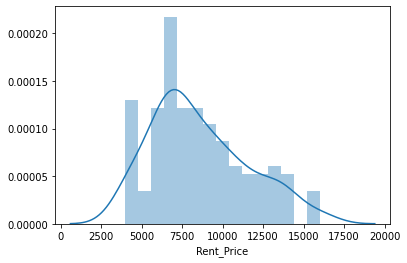

In [65]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

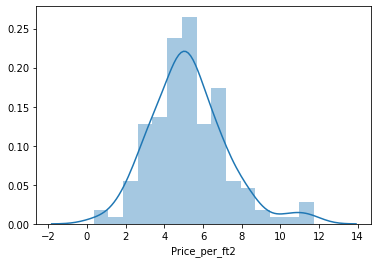

In [66]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

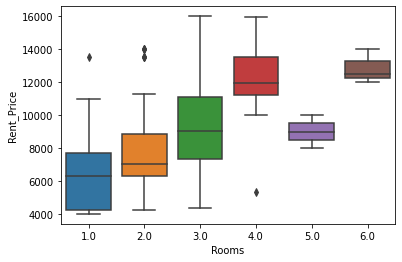

In [67]:
sns.boxplot(x = 'Rooms', y = 'Rent_Price', data = mh_rent)

<h4>Map of Manhattan Apartments for Rent</h4>

The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated (max US7000).

In [68]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude = 40.7308619
longitude = -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

<h4>Map of Manhattan: Places for Rent and the Cluster of Venues</h4>

Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.
This is an insightful way to explore rental possibilites

In [69]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude = 40.7308619
longitude = -73.9871558

# create map with clusters
kclusters = 5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)

# Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

Now one can explore a particular rental place and its venues in detail. In the map above, examination of appartments with rental place below 7000/month is straightforwad while knowing the venues around it.

We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.

In [70]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


Mapping Manhattan Subway locations
Manhattan subway metro locations ( address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit. For simplification, a csv file was produced from the 'numbers' (Apple excel) so that the reading of this file is the starting point here.

The geodata will be obtain via Nominatim using the algorythm below.

In [71]:
# A csv file summarized the subway station and the addresses for next step to determine geodata
mh = pd.read_csv('NYC_subway_list.csv')
mh.head()

,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


Add colums labeled 'lat' and 'long' to be filled with Geodata

In [74]:
#  Add columns 'lat'  and 'long' to mh dataframe - with random temporary numbers to get started
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

In [76]:
## Algorithm to find latitude and longitud for each subway metro station and add them to dataframe

for n in range(len(mh)):
    address= mh['sub_address'][n]
    geolocator = Nominatim(user_agent = "toronto_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    mh['lat'][n]=latitude
    mh['long'][n]=longitude
    
    #print(n,latitude,longitude)
    time.sleep(2)

print('Geodata Completed')

# save dataframe to csv file
mh.to_csv('MH_subway_2.csv',index=False)
mh.shape

/Users/kevilkhadka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kevilkhadka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Geodata Completed


(76, 4)

In [77]:
mh=pd.read_csv('MH_subway_2.csv')
print(mh.shape)
mh.head()

(76, 4)


,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.758798,-73.962343
2,Broad St,"New York, NY 10005, USA",40.712728,-74.006015
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.758798,-73.962343


In [78]:
# removing duplicate rows and creating new set mhsub1
mhsub1=mh.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
mhsub1.shape

(21, 4)

In [79]:
mhsub1.head()

,sub_station,sub_address,lat,long
0,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
1,Broadway-Lafayette St Station,"E Houston St, New York, 10012, United States",40.725684,-73.997726
2,Bowery Station,"Bowery, New York, NY 10002, USA",40.720298,-73.993567
3,34th Street-Hudson,"380-394 11th Ave, New York, NY 10001, USA",40.754337,-74.002916
4,Prince St,"88 Prince St, New York, NY 10012, USA",40.724412,-73.998317


In [80]:
mhsub1.tail()

,sub_station,sub_address,lat,long
16,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
17,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762794,-73.967564
18,23 Street Station,"New York, NY 10010, United States",40.758798,-73.962343
19,14 Street / 8 Av,"New York, NY 10014, United States",40.712728,-74.006015
20,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


<h4>Map of Manhattan: The Location of Subway Stations</h4>

In [81]:
# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
        parse_html=False).add_to(map_mhsub1)
    
map_mhsub1

<h4>Map of Manhattan: Places for Rent and the Subway Locations Nearby</h4>
    
Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name. Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station

In [82]:
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799763,-73.966193
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788517,-73.955118
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799763,-73.966193
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730337,-74.002476
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [89]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude = 40.7308619
longitude = -73.9871558

map_manhattan_rent = folium.Map(location=[latitude,longitude],zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$' + mh_rent['Rent_Price'].astype(str) + mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'], mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
        parse_html = False).add_to(map_manhattan_rent) 
    
# Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

## Results <a name="results"></a>

<h4>ONE CONSOLIDATE MAP </h4>

Let's consolidate all the required inforamtion to make the apartment selection in one map.

<h4>Map of Manhattan with Rental Places, Subway Locations and Cluster of Venues</h4>

Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues.

In [84]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
        parse_html = False).add_to(map_mh_one) 

# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

# Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

<h4>Problem Resolution</h4>

The above consolidate map was used to explore options. After examining, we chose two locations that meet the requirements which will assess to make a choice.

1. Apartment 1: 305 East 63rd Street in the Sutton Place Neighborhood and near 'subway 59th Street' station, Cluster #2 Monthly rent : 7500 Dollars

2. Apartment 2: 19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster #3 Monthly rent : 6935 Dollars

<h4>Venues for Apartment 1 - Cluster #2</h4>

In [85]:
# kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


<h4>Venues for Apartment 2 - Cluster #3</h4>

In [86]:
# kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


<h4>Apartment Selection</h4>

Using the "one map" above, we can able to explore all possibilities since the popups provide the information needed for a good decision.

Apartment 1 rent cost is US 7500 slightly above the US 7000 budget. Apt 1 is located 400 meters from subway station at 59th Street and work place ( Park Ave and 53rd) is another 600 meters way. I can walk to work place and use subway for other places aroung. Venues for this apt are as of Cluster 2 and it is located in a fine district in the East side of Manhattan.

Apartment 2 rent cost is US6935, just under the US7000 budget. Apt 2 is located 60 meters from subway station at Fulton Street, but we will have to ride the subway daily to work , possibly 40-60 min ride. Venues for this apt are as of Cluster #3.

Based on current Singapore Venues, we can feel that Cluster #2 type of venues is a closer resemblance to current place. That means that Apt 1 is a better choice since the extra monthly rent is worth the conveniences it provides.

## Discussion <a name = "discussion"></a>

In general, we positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course.

I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned. I have created a good project that I can present as an example to show my potential. I feel I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases.

## Conclusion <a name = "conclusion"></a>

I feel rewarded with the efforts, time and money spent. I believe this course with all the topics covered is well worthy of appreciation. This project has shown me a practical application to resolve a real situation that has impacting personal and financial impact using Data Science tools.

The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. I would recommend for use in similar situations. One must keep abreast of new tools for DS that continue to appear for application in several business fields.